In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',55)

In [4]:
df = pd.read_csv('../data/dataset_eda.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player Link,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,Year Drafted,Rk,Cap Maximum
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,1.3,3.0,0.434,2.0,4.1,0.488,0.557,0.9,1.2,0.735,0.7,2.4,3.1,1.7,0.6,0.4,0.9,2.7,8.8,2010,/players/a/afflaar01.html,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,1086240.0,2007.0,27.0,57700000
1,Alexis Ajinça,C,21,CHA,6,0,5.0,0.8,1.7,0.500,0.0,0.0,NaN,0.8,1.7,0.500,0.500,0.0,0.2,0.000,0.2,0.5,0.7,0.0,0.2,0.2,0.3,0.8,1.7,2010,/players/a/ajincal01.html,6.3,0.479,0.000,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,1372080.0,2008.0,20.0,57700000
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,0.1,0.2,0.313,7.4,14.8,0.498,0.497,2.9,3.9,0.757,2.5,5.6,8.0,2.1,0.9,0.6,1.3,3.0,17.9,2010,/players/a/aldrila01.html,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,5844827.0,2006.0,2.0,57700000
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,0.0,0.1,0.000,0.1,0.6,0.200,0.167,0.3,0.4,0.667,0.3,0.4,0.6,0.3,0.1,0.1,0.0,1.1,0.5,2010,/players/a/alexajo01.html,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,2583360.0,2008.0,8.0,57700000
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,0.0,0.1,0.167,0.9,2.2,0.409,0.401,0.2,0.3,0.923,0.7,0.9,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2010,/players/a/allenma01.html,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,1300000.0,NaN,NaN,57700000


### More Data Cleaning

In [5]:
more_than_5_null =df[df.isna().sum(axis=1)>5]
indices_to_drop = df[df.isna().sum(axis=1) > 5].index
more_than_5_null['FGA'].value_counts()

0.0    34
Name: FGA, dtype: int64

Any player that didn't even attempt a shot, probably doesn't have enough stats to be modeled.
This is aligned with my problem statement, to predict salary for any player that recorded stats. I am dropping these rows from the dataframe.

In [6]:
df.drop(indices_to_drop,inplace = True)

In [7]:
df.dtypes

Player           object
Pos              object
Age               int64
Tm               object
G                 int64
GS                int64
MP              float64
FG              float64
FGA             float64
FG%             float64
3P              float64
3PA             float64
3P%             float64
2P              float64
2PA             float64
2P%             float64
eFG%            float64
FT              float64
FTA             float64
FT%             float64
ORB             float64
DRB             float64
TRB             float64
AST             float64
STL             float64
BLK             float64
TOV             float64
PF              float64
PTS             float64
Year              int64
Player Link      object
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            

In [8]:
#making some columns integers instead of floats for readability
#This function won't fix the types of columns with missing values. So I may call it later have the missing values
# have been imputed
def floats_to_ints(df):
    ints = ['Year','Age','G','GS','Year Drafted','Rk','Salary']
    for i in ints:
        if not df[i].isna().any():
            df[i] = df[i].astype(int)
        else:
            df[i] = df[i]
    return df

In [9]:
df = floats_to_ints(df)

In [10]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player Link,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,Year Drafted,Rk,Cap Maximum
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,1.3,3.0,0.434,2.0,4.1,0.488,0.557,0.9,1.2,0.735,0.7,2.4,3.1,1.7,0.6,0.4,0.9,2.7,8.8,2010,/players/a/afflaar01.html,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,1086240.0,2007.0,27.0,57700000
1,Alexis Ajinça,C,21,CHA,6,0,5.0,0.8,1.7,0.500,0.0,0.0,NaN,0.8,1.7,0.500,0.500,0.0,0.2,0.000,0.2,0.5,0.7,0.0,0.2,0.2,0.3,0.8,1.7,2010,/players/a/ajincal01.html,6.3,0.479,0.000,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,1372080.0,2008.0,20.0,57700000
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,0.1,0.2,0.313,7.4,14.8,0.498,0.497,2.9,3.9,0.757,2.5,5.6,8.0,2.1,0.9,0.6,1.3,3.0,17.9,2010,/players/a/aldrila01.html,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,5844827.0,2006.0,2.0,57700000
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,0.0,0.1,0.000,0.1,0.6,0.200,0.167,0.3,0.4,0.667,0.3,0.4,0.6,0.3,0.1,0.1,0.0,1.1,0.5,2010,/players/a/alexajo01.html,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,2583360.0,2008.0,8.0,57700000
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,0.0,0.1,0.167,0.9,2.2,0.409,0.401,0.2,0.3,0.923,0.7,0.9,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2010,/players/a/allenma01.html,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,1300000.0,NaN,NaN,57700000


In [11]:
df.shape

(7026, 55)

### EDA and Feature Engineering

In [19]:
#This is a function to return a distribution of a numeric variable
def plot_distribution(variable,df):
    plt.hist(df[variable], bins = 20)
    plt.xlabel(f'{variable}')
    plt.ylabel('Frequency')
    plt.title(f'{variable} Distribution');
    plt.savefig(f'../figures/{variable}_distribution.png')

In [20]:
#This is a function to return a bar chart of categorical features compared to the target variable
def plot_category(category, df, sort =False, x= ''):
    grouped_data = df.groupby(category)['Salary'].mean()
    if sort == True:
        grouped_data = grouped_data.sort_values(ascending =True)
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar')
    plt.title(f'Average Salary by {category} since 09-10 season{x}')
    plt.xlabel(f'{category}{x}')
    plt.ylabel('Average Salary')
    plt.show()
    plt.savefig(f'../figures/salary_by_{category}.png')


In [24]:
#This is a function to return a scatter plot of a numeric feature compared to the target variable
def plot_numeric(numeric, df, x= ''):
    df_copy = df.copy()
    df_copy['Decile'] = pd.qcut(df[numeric],10)
    
    # Group by bins and calculate average earnings for each bin
    grouped_data = df_copy.groupby('Decile')['Salary'].mean()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    grouped_data.plot(kind='bar')
    plt.title(f'Average Salary by Decile of {numeric}{x}')
    plt.xlabel(f'Decile of {numeric}{x}')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig(f'../figures/average_salary_by_{numeric}.png')



In [25]:
#This is function to return a plot of a numeric feature, excluding where that value is equal to 0. 
#This is often a more interesting graph to look at.
def plot_numeric_exclude_zeros(numeric, df, x= ''):
    df_filtered = df[df[numeric] != 0].copy()
    df_filtered['Decile'] = pd.qcut(df_filtered[numeric], 10)
    grouped_data = df_filtered.groupby('Decile')['Salary'].mean()
    plt.figure(figsize=(10, 5))
    grouped_data.plot(kind='bar')
    plt.title(f'Average Salary by Decile of {numeric}{x}(excluding zeros)')
    plt.xlabel(f'Decile of {numeric}{x}')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig(f'../figures/average_salary_by_{numeric}.png')


### Salary

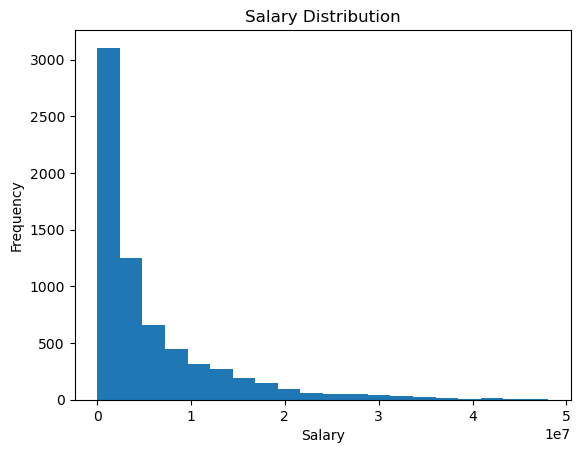

In [26]:
plot_distribution('Salary',df)

By far, most players are in the 0-5 milion range. Then there are less and less players in the respective ranges. A model may be 'overfit' to predicting a lower salary.

In [27]:
df['Salary'].isnull().sum()

246

These are the rows where the salary reading did not work, for one reason or another. I will drop these from the dataframe at the end.

### Year_Drafted

Year_drafted is null for undrafted players. So, I will impute this as the first year that the player played -1. If a payer was drafted in 2022 and they played in their rookie season, their first entry in year will be 2023. This will return the year 2023 for the year_first_played.

In [28]:
Year_First_Played= df.groupby('Player')['Year'].min()-1

In [29]:
df['Year First Played'] = df['Player'].map(Year_First_Played)

In [30]:
(df['Year First Played'] != df['Year Drafted']).sum()

3858

This is not exactly equal to the amount of null values, as a player may be drafted and then not play in their first year or second year. Which would result in a different value for the year_drafted and year_first_played. If a player was drafted in 2014 but did not record any stats until 2016, we would see two different values. For undrafted players, i am going to impute the year_entered_league value- while keeping in mind that they may have been on a roster prior to that but not recorded any stats. It should be a reasonable approximation of their rookie season. 

In [31]:
df['Year Drafted'].fillna(df['Year First Played'],inplace = True)

In [32]:
df['Year Drafted'].isnull().value_counts()

False    7026
Name: Year Drafted, dtype: int64

### Years Experience
This will be a new feature, which will be the current year minus the year drafted. This will return a 1 for players who are in their rookie season. a 2 for a player in their second season, etc.


In [33]:
df['Years Experience']= df['Year']-df['Year Drafted']

In [34]:
df['Years Experience'].value_counts()


1.0     1267
2.0     1002
3.0      807
4.0      677
5.0      564
6.0      487
7.0      438
8.0      394
9.0      341
10.0     284
11.0     225
12.0     181
13.0     128
14.0     101
15.0      59
16.0      32
17.0      21
18.0      10
19.0       5
20.0       2
21.0       1
Name: Years Experience, dtype: int64

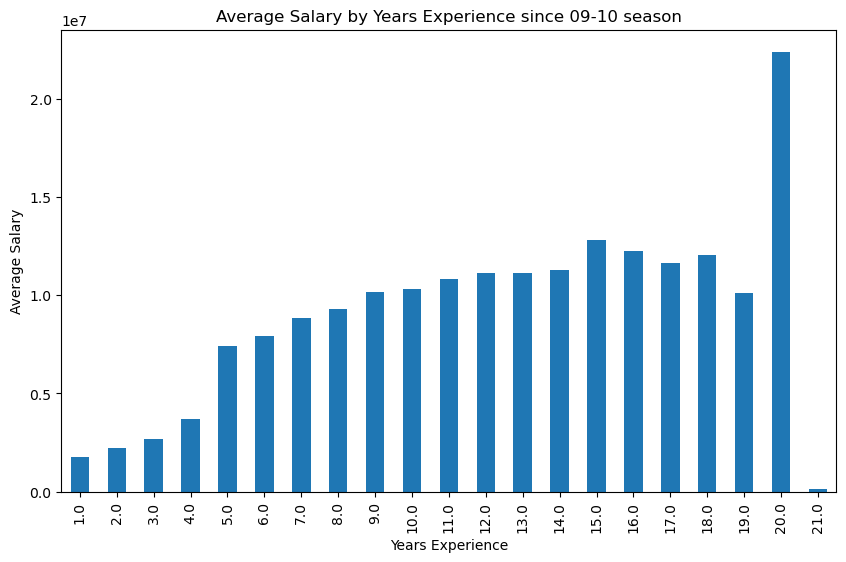

<Figure size 640x480 with 0 Axes>

In [35]:
plot_category('Years Experience',df)

This was an important feature addition, as players who are on rookie contracts (years 1-4) make substantially less than other players.

In [36]:
df['Years Experience Category']= df['Years Experience'].map(lambda x: '1-4' if 1<=x<=4 else '5-8' if 5<=x<=8 else '9-12' if 9<=x<=12 else '13+')

In [37]:
df['Years Experience Category'].value_counts()

1-4     3753
5-8     1883
9-12    1031
13+      359
Name: Years Experience Category, dtype: int64

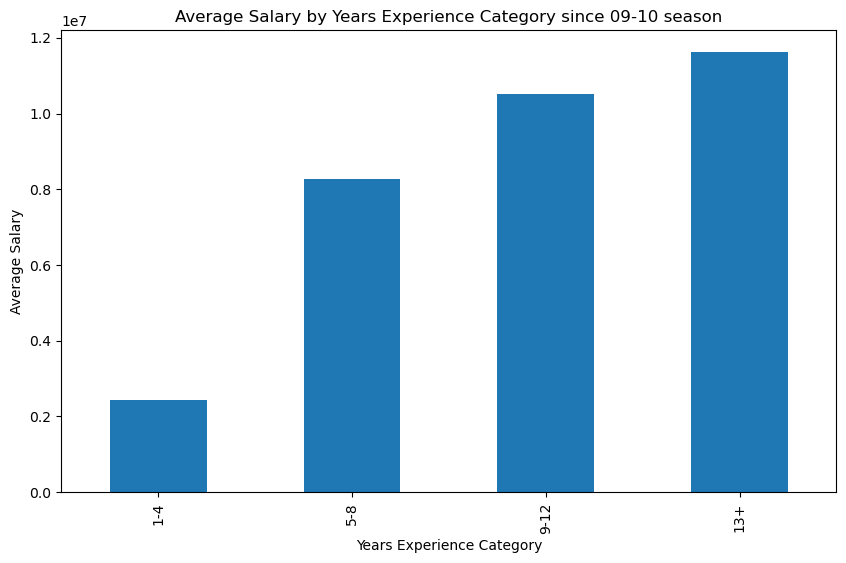

<Figure size 640x480 with 0 Axes>

In [38]:
plot_category('Years Experience Category', df,True)

Generally, the longer a player plays in the NBA the more money they. make. This makes sense, as the players that last 13+ years are often Star players.

In [39]:
df.drop(columns = ['Years Experience','Year Drafted','Year First Played'],inplace = True)

### Rk / Draft_Position

In [40]:
df.rename(columns = {'Rk': 'Draft Position'}, inplace = True)

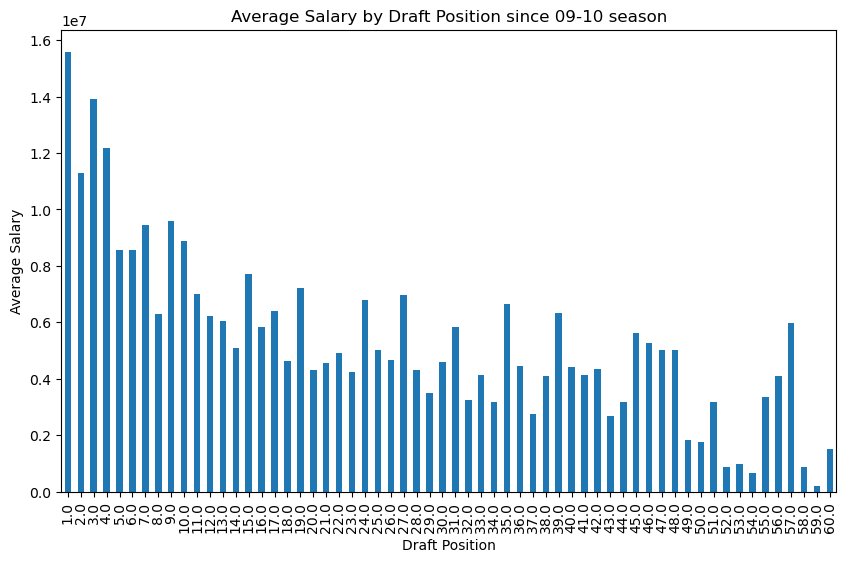

<Figure size 640x480 with 0 Axes>

In [41]:
plot_category('Draft Position',df)

This graph is all over the place. I will now create a new column that is the draft_position,but as a category. Using basketball knowledge, a top 4 pick is generally super valueable. There is diminishing returns on later picks in the draft. But i expect the salary for top4 players to be much higher than 4-10, and so on. I will make the categories as follow: 
1-4,
5-10,
11-20,
21-30,
31-45,
46-60,
undrafted

In [42]:
df['Draft Position Category'] = df['Draft Position'].apply(lambda x: '1-4' if 1<= x <=4 else '5-10' if 5 <= x <= 10 else
                                                          '11-20' if 11<=x <=20 else '21-30' if 21 <= x <=30 else '31-45'
                                                          if 31 <= x <= 45 else '46-60' if 46 <= x <= 60 else 'undrafted')

In [43]:
df['Draft Position Category'].value_counts()

undrafted    1715
11-20        1173
31-45        1062
21-30        1014
5-10          877
1-4           639
46-60         546
Name: Draft Position Category, dtype: int64

1715 is the same number of null values. so the function is working correctly!

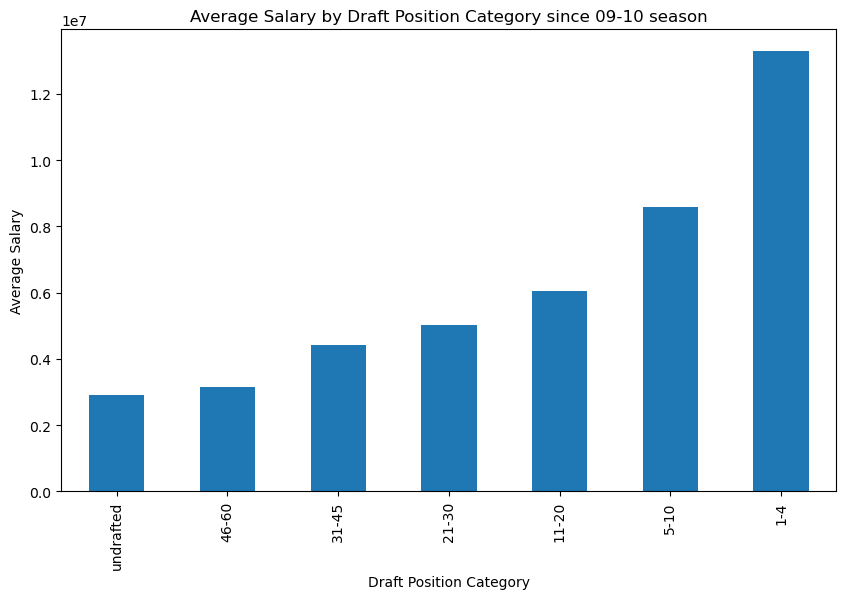

<Figure size 640x480 with 0 Axes>

In [44]:
plot_category('Draft Position Category',df,True)

Top picks tend to make a lot of money, while lower picks do not make as much

In [45]:
#dropping draft position as it is no longer needed

In [46]:
df.drop(columns = 'Draft Position',inplace = True)

### Cap Maximum

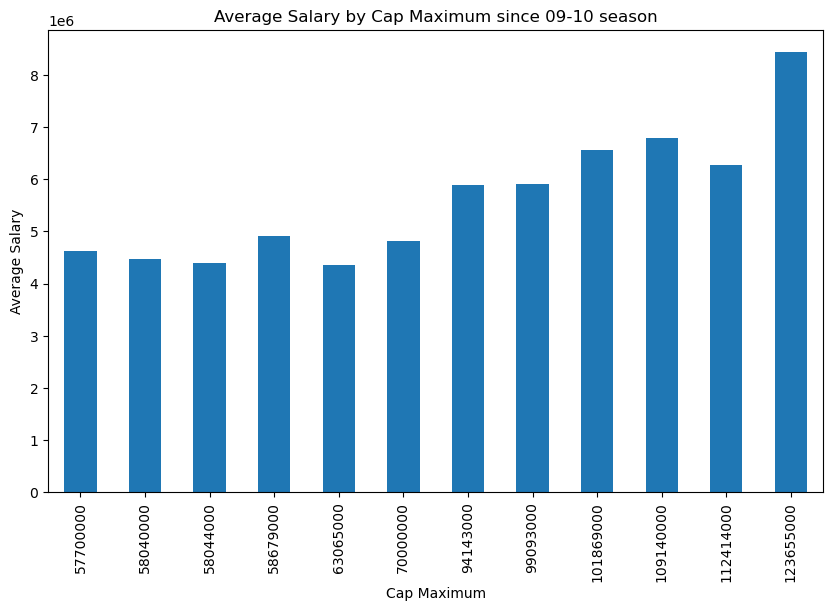

<Figure size 640x480 with 0 Axes>

In [47]:
plot_category('Cap Maximum',df)

Generally, as the cap max goes up, so does the average salary. 

### Total Minutes
Creating a variable of total minutes, which will display how many minutes a player played in a given season

In [48]:
df['Total Minutes']= df['MP'] *df['G']

In [49]:
df['Total Minutes']

0       2222.2
1         30.0
2       2925.0
3         28.8
4        453.9
         ...  
7055     793.8
7056    2540.4
7057      82.8
7058     217.5
7059    2173.6
Name: Total Minutes, Length: 7026, dtype: float64

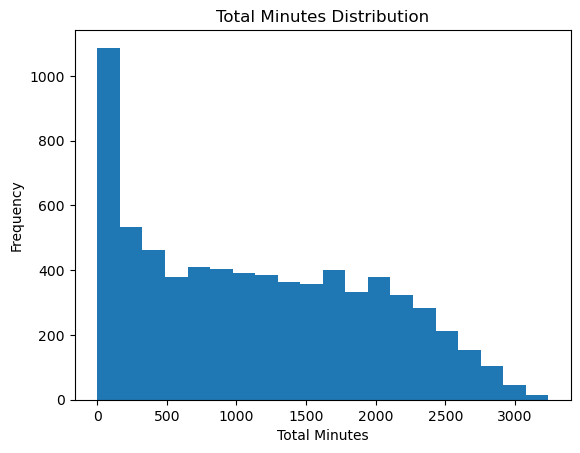

In [50]:
plot_distribution('Total Minutes',df)

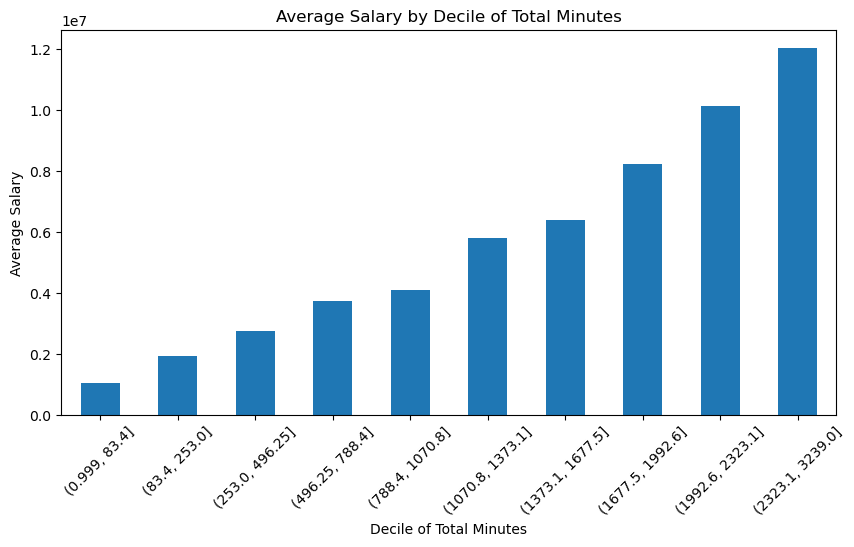

<Figure size 640x480 with 0 Axes>

In [51]:
plot_numeric('Total Minutes',df)

As total minutes increase, so do earnings

### Position
    

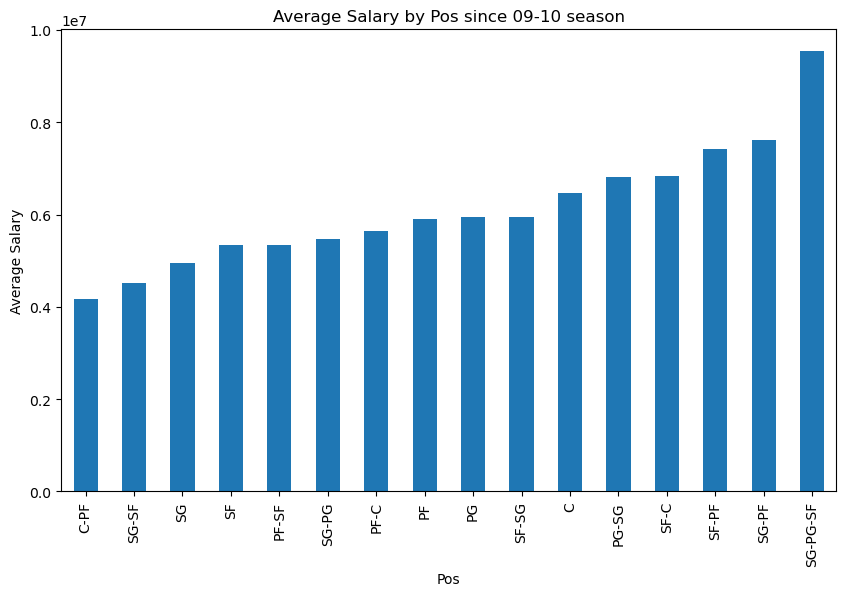

<Figure size 640x480 with 0 Axes>

In [52]:
plot_category('Pos', df, True)

In [53]:
df['Pos'].value_counts()

SG          1538
PF          1386
C           1369
PG          1325
SF          1287
SF-SG         19
SG-PG         16
PF-SF         16
SF-PF         16
SG-SF         14
PF-C          12
C-PF          12
PG-SG         12
SG-PF          2
SF-C           1
SG-PG-SF       1
Name: Pos, dtype: int64

There are basicaslly onlyy 5 positions in basketball. I am not sure why some of them are imputed as playing multiple positions. Typically, when a players position is denoted like this- the first position is their primary position. So i am going to change all of these to be the player's frist position.

In [54]:
df['Pos']=df['Pos'].str[:2].map(lambda x: 'C'if x == 'C-'else x)

In [55]:
df['Pos'].value_counts()

SG    1571
PF    1414
C     1381
PG    1337
SF    1323
Name: Pos, dtype: int64

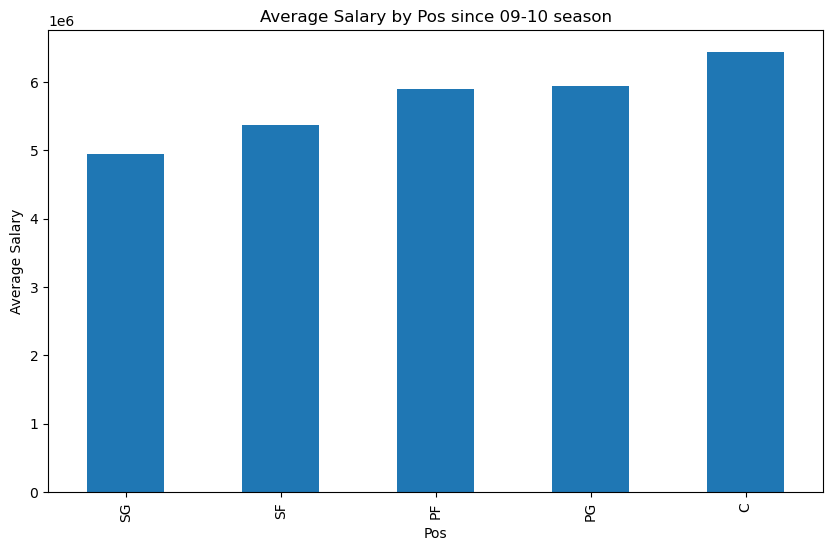

<Figure size 640x480 with 0 Axes>

In [56]:
plot_category('Pos',df,True)

In [57]:
df[df['Pos']=='C']['Salary'].mean()

6435495.672192916

In [58]:
# Creating these dataframes for EDA purposes
df_c = df[df['Pos']=='C']
df_pg = df[df['Pos']=='PG']
df_pf = df[df['Pos']=='PF']
df_sf = df[df['Pos']=='SF']
df_sg= df[df['Pos']=='SG']

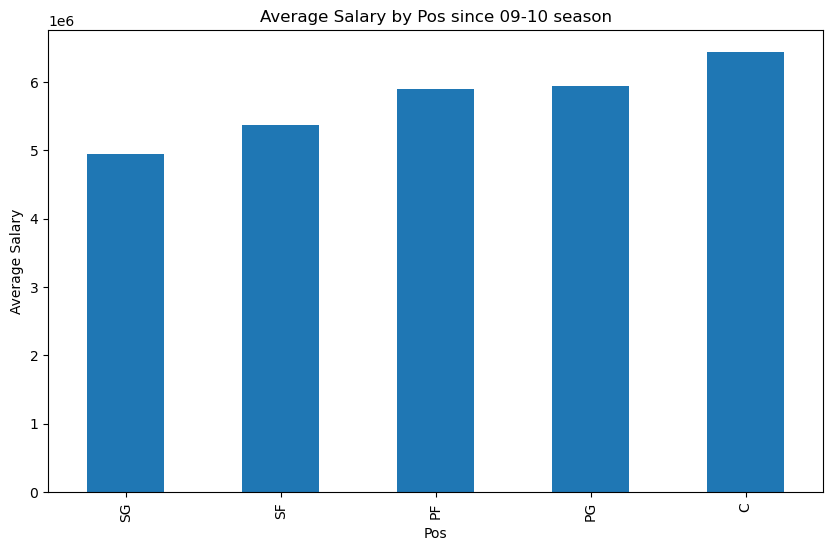

<Figure size 640x480 with 0 Axes>

In [59]:
plot_category('Pos',df,True)

### Year

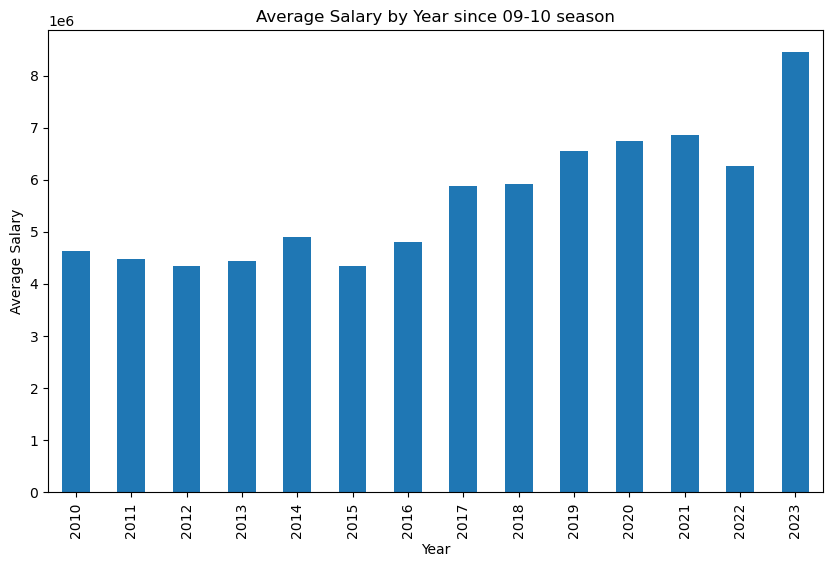

<Figure size 640x480 with 0 Axes>

In [60]:
plot_category('Year',df)

Generally as the year goes up, the earnings go up.

### Age

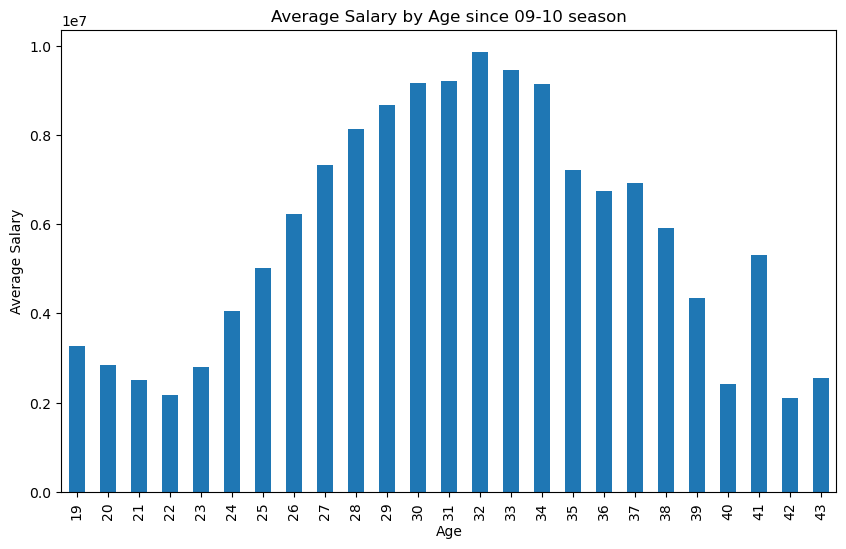

<Figure size 640x480 with 0 Axes>

In [61]:
plot_category('Age',df)

Salary for 19 year olds is higher than 20-23, likely because these are known star players that get good contracts at young age. Then earnings graudally increase until it peaks at 32, then it steadily goes down. 

### Team

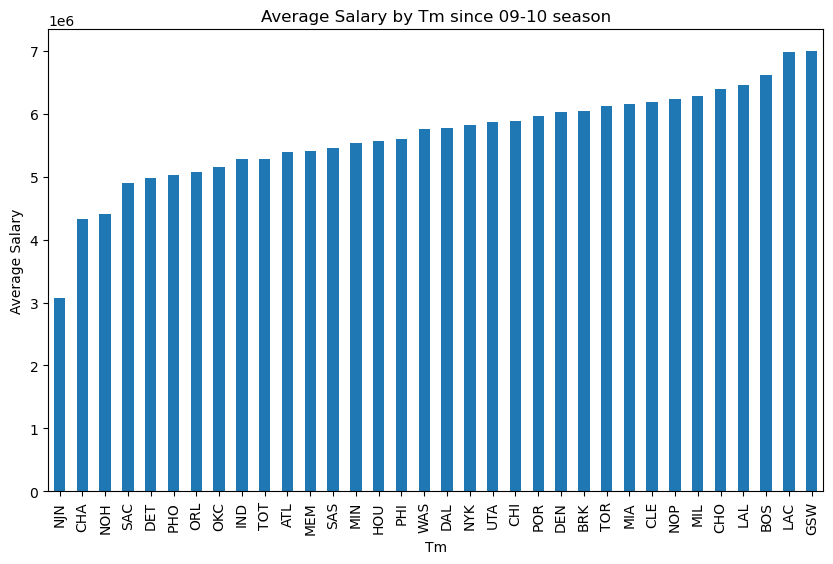

<Figure size 640x480 with 0 Axes>

In [62]:
plot_category('Tm',df,True)

This graph is just for fun. The clippers have paid the most. The new orleans hornets and new jersey nets are at the bottom, becuase they only existed in the early 2010s when salaries were generally lower. Of the teams that still exist, phoneix has paid the least.

### Games Played

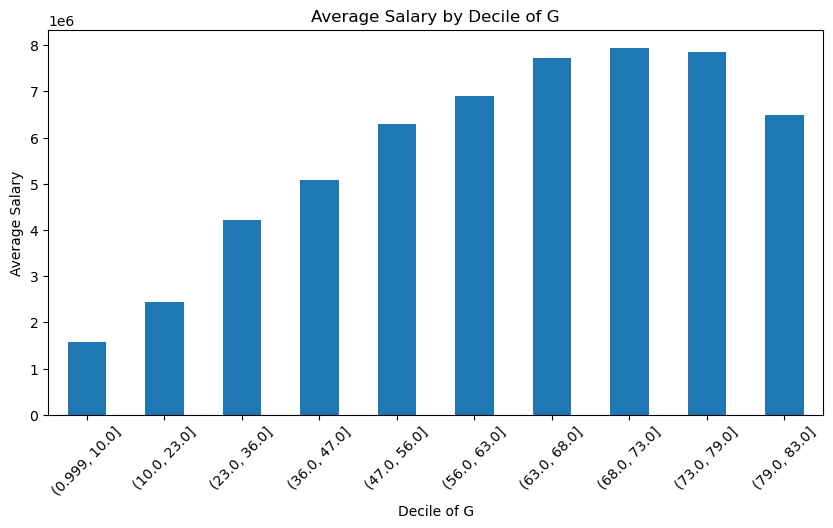

<Figure size 640x480 with 0 Axes>

In [63]:
plot_numeric('G',df)

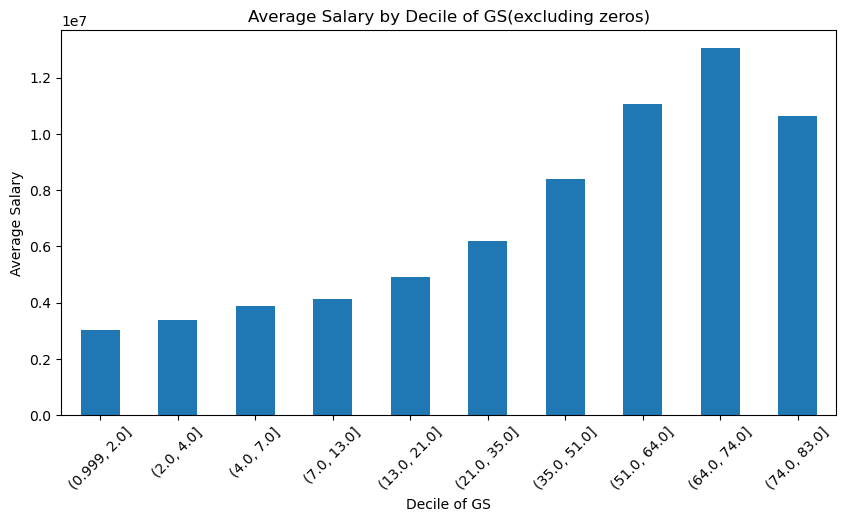

<Figure size 640x480 with 0 Axes>

In [64]:
plot_numeric_exclude_zeros('GS',df)

Star players often takes game off to rest, so it makes sense that the last group is slightly lower than the previous one.

### Field Goals

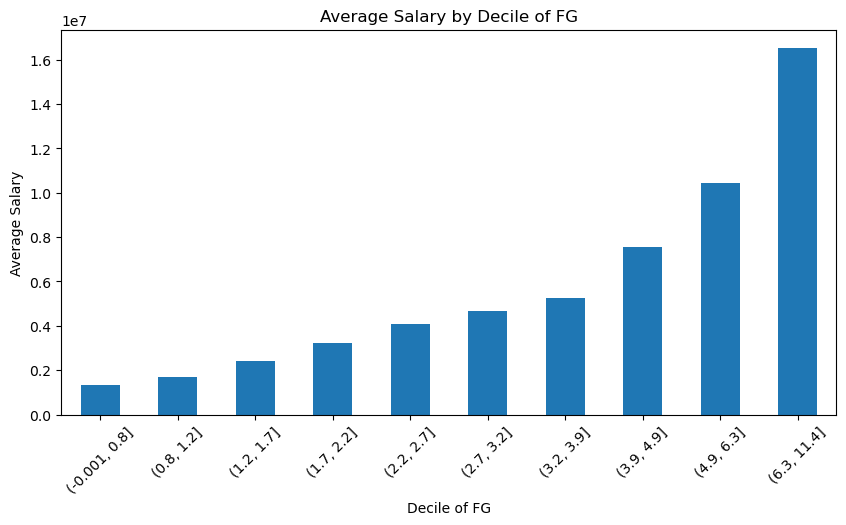

<Figure size 640x480 with 0 Axes>

In [65]:
plot_numeric('FG',df)

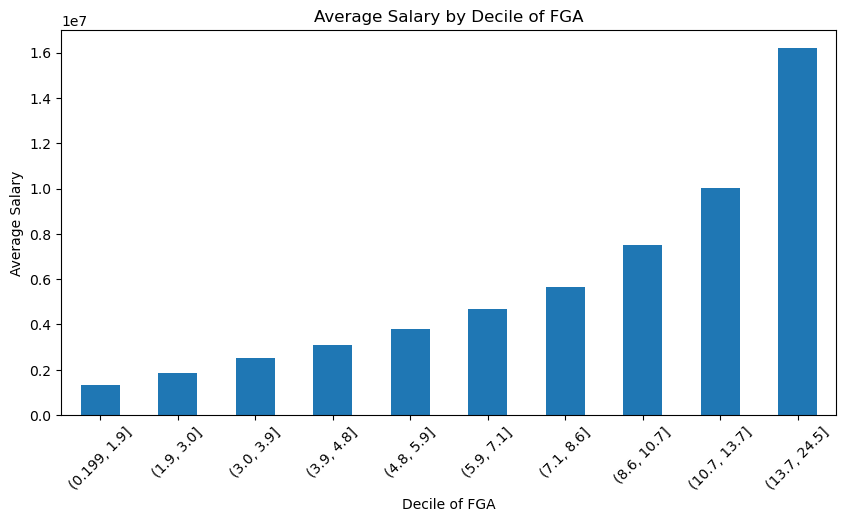

<Figure size 640x480 with 0 Axes>

In [66]:
plot_numeric('FGA',df)

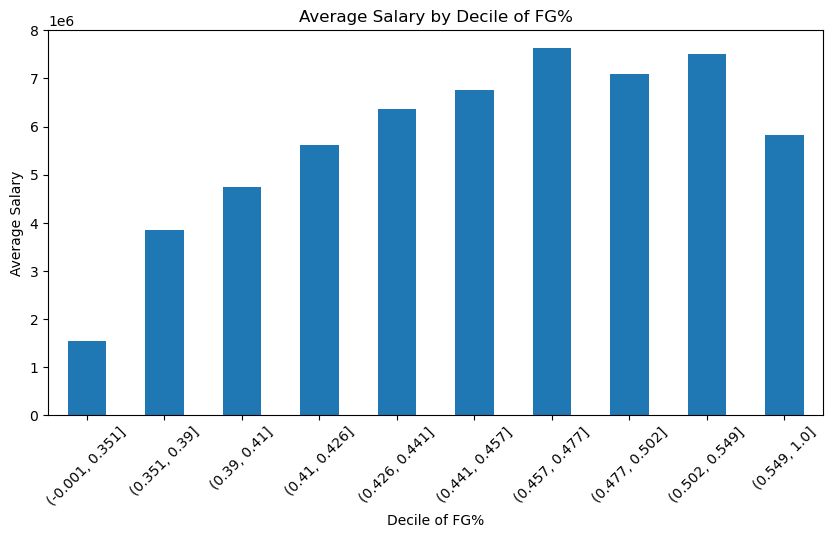

<Figure size 640x480 with 0 Axes>

In [67]:
plot_numeric('FG%',df)

There is a strong relationship between Field Goals made/attempted and salary, while field goal% doesnt seem to be as strong of an indicator of pay

### 3 Pointers

From these two scatter plots we see that 3 point shooting is more important for SG than C

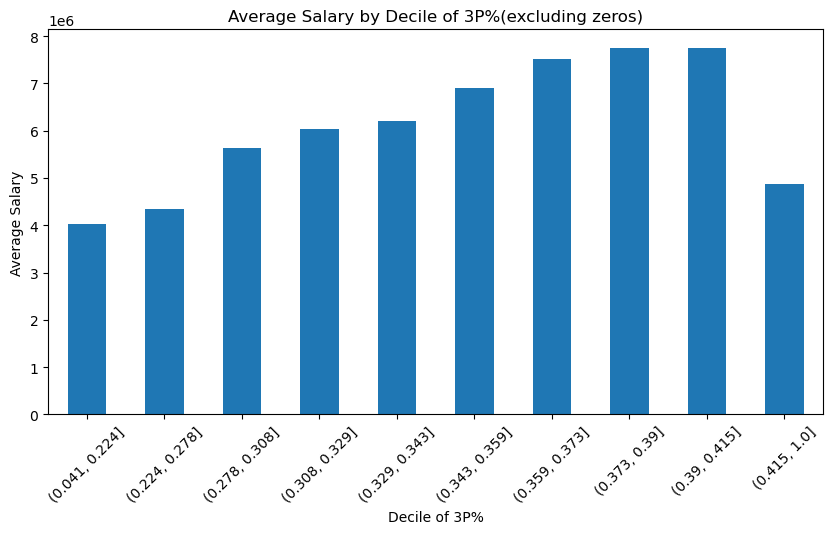

<Figure size 640x480 with 0 Axes>

In [68]:
plot_numeric_exclude_zeros('3P%',df)

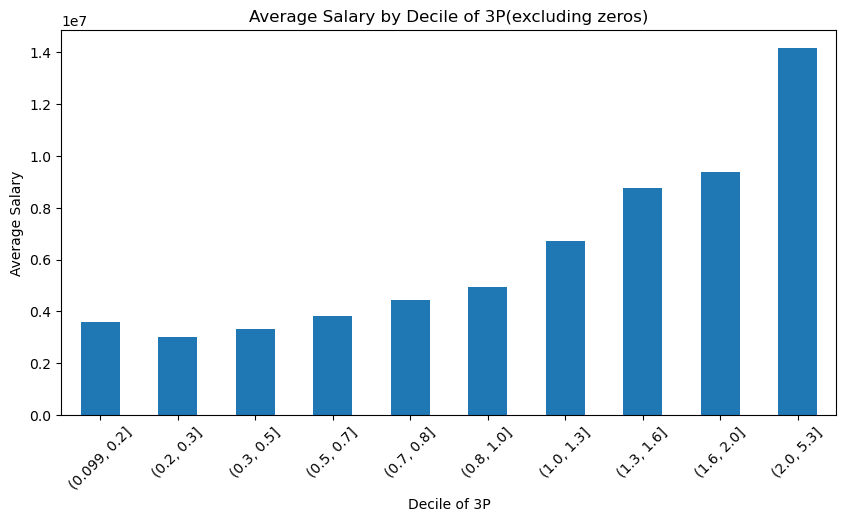

<Figure size 640x480 with 0 Axes>

In [69]:
plot_numeric_exclude_zeros('3P',df)

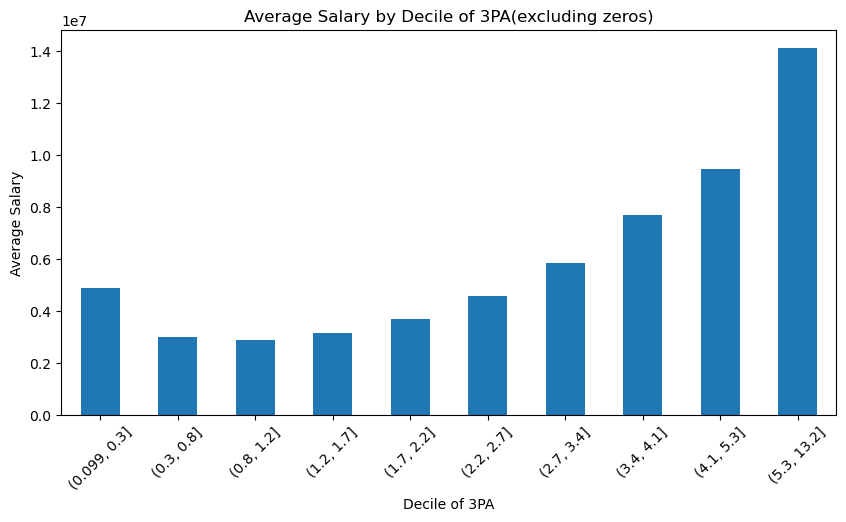

<Figure size 640x480 with 0 Axes>

In [70]:
plot_numeric_exclude_zeros('3PA',df)

There is generally a trend upwards, but with some caveats. Efficiency stats(%) tend to trend downwards in the last category. This is a category of players who are extremely efficient but likely do not play/shoot the ball as much as star players. This is why they make less. They are efficient on less shots. A random forest model should account for this better than logistic regression.

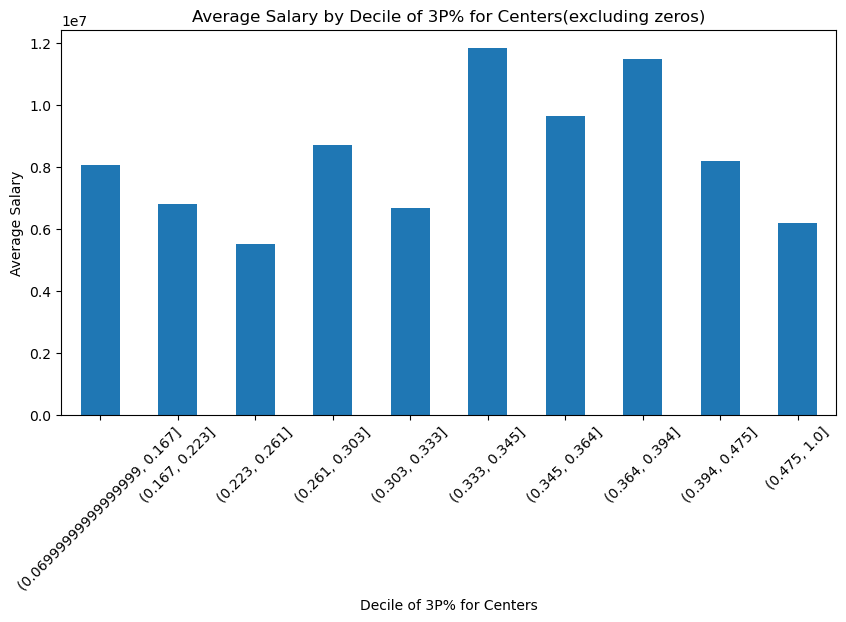

<Figure size 640x480 with 0 Axes>

In [71]:
plot_numeric_exclude_zeros('3P%',df_c, x= ' for Centers')

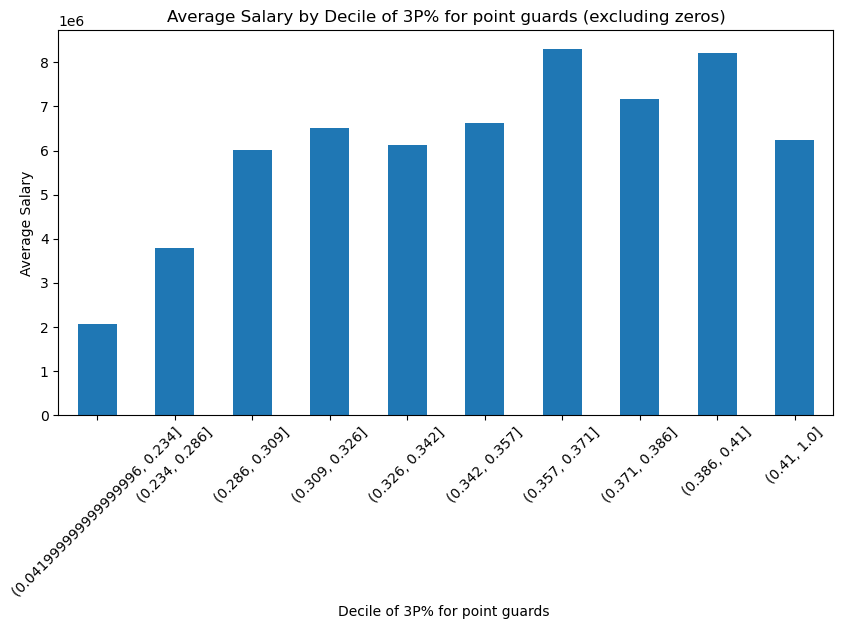

<Figure size 640x480 with 0 Axes>

In [72]:
plot_numeric_exclude_zeros('3P%',df_pg, ' for point guards ')

3 point shooting is more important for point guards than for centers

In [73]:
df_2016 = df[df['Year']> 2015]
df_pre_2016 = df[df['Year']<=2015]

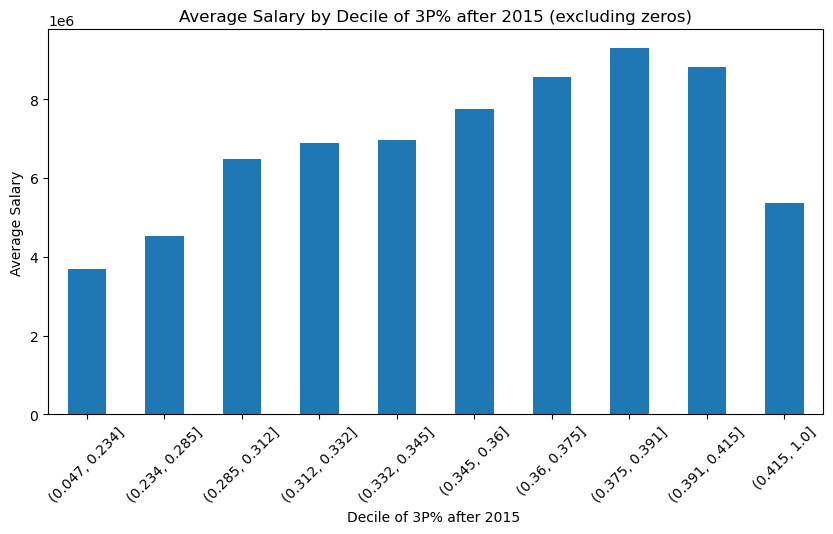

<Figure size 640x480 with 0 Axes>

In [74]:
plot_numeric_exclude_zeros('3P%',df_2016,' after 2015 ')

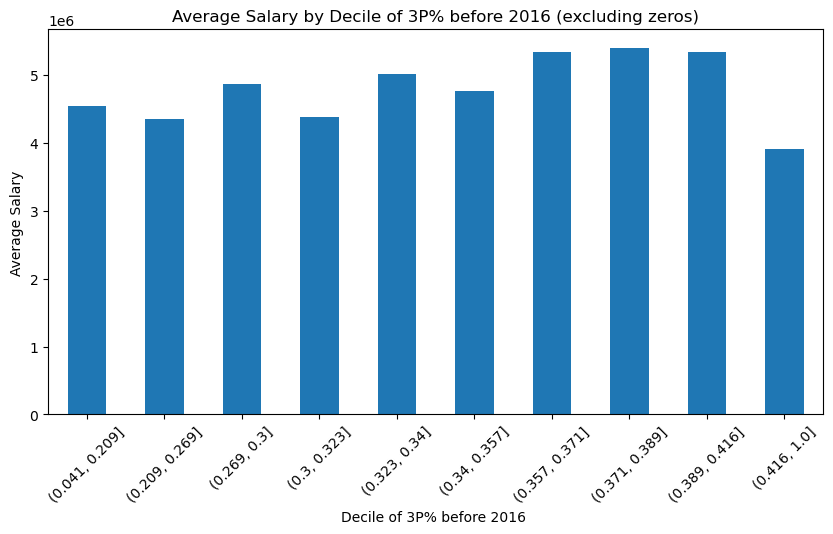

<Figure size 640x480 with 0 Axes>

In [75]:
plot_numeric_exclude_zeros('3P%',df_pre_2016, ' before 2016 ')

After steph curry won his MVP, there was a sort of 3 point revolution. 3 pointers were valued much more after 2015 than they were before.

### Null Value Imputation

This is a function that imputes for null values. If the player shot zero field goals in a season and their FG% is null, then it imputes the mean FG% for that position. This is guessing what it would be if they shot any shots from that range. This is a better method than imputing the mean. The mean by position will get closer to their true percentage.

In [76]:
def fill_null_with_mean(column, column_to_check):
    means_by_position = df.groupby('Pos')[column].mean()
    def impute_by_position(row):
        if pd.isna(row[column]) and row[column_to_check] == 0:
            return means_by_position[row['Pos']]
        else:
            return row[column]
    df[column] = df.apply(impute_by_position, axis=1)
    print(means_by_position)

In [77]:
df[df['3P%'].isna()].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,Year,Player Link,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,Cap Maximum,Years Experience Category,Draft Position Category,Total Minutes
1,Alexis Ajinça,C,21,CHA,6,0,5.0,0.8,1.7,0.500,0.0,0.0,NaN,0.8,1.7,0.500,0.500,0.0,0.2,0.000,0.2,0.5,0.7,0.0,0.2,0.2,0.3,...,2010,/players/a/ajincal01.html,6.3,0.479,0.0,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,1372080.0,57700000,1-4,11-20,30.0
11,Antonio Anderson,SF,24,OKC,1,0,15.0,1.0,3.0,0.333,0.0,0.0,NaN,1.0,3.0,0.333,0.333,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2010,/players/a/anderan02.html,-1.7,0.333,0.0,0.000,7.9,0.0,3.8,0.0,0.0,0.0,25.0,12.0,0.0,0.0,0.0,-0.104,-7.6,-4.8,-12.4,0.0,2300000.0,57700000,1-4,undrafted,15.0
14,Joel Anthony,C,27,MIA,80,16,16.5,1.0,2.0,0.478,0.0,0.0,NaN,1.0,2.0,0.478,0.478,0.8,1.2,0.717,1.5,1.6,3.1,0.2,0.3,1.4,0.6,...,2010,/players/a/anthojo01.html,10.2,0.546,0.0,0.579,11.0,11.1,11.1,1.3,0.8,6.7,18.4,8.7,1.0,2.0,3.1,0.111,-3.4,1.7,-1.7,0.1,825497.0,57700000,1-4,undrafted,1320.0
22,Jeff Ayres,C,22,POR,39,4,10.4,1.1,1.7,0.662,0.0,0.0,NaN,1.1,1.7,0.662,0.662,0.5,0.5,0.900,0.6,1.9,2.5,0.0,0.2,0.4,0.3,...,2010,/players/p/pendeje02.html,12.1,0.705,0.0,0.308,7.6,22.5,15.0,0.4,0.9,3.2,14.0,10.1,0.8,0.6,1.3,0.156,-3.4,0.4,-3.0,-0.1,457588.0,57700000,1-4,31-45,405.6
30,Earl Barron,C,28,NYK,7,6,33.1,4.3,9.7,0.441,0.0,0.0,NaN,4.3,9.7,0.441,0.441,3.1,4.1,0.759,4.4,6.6,11.0,1.1,0.6,0.6,1.6,...,2010,/players/b/barroea01.html,14.7,0.508,0.0,0.426,14.9,22.9,18.9,5.2,0.9,1.3,12.0,17.9,0.3,0.2,0.4,0.091,-1.5,-2.9,-4.5,-0.1,NaN,57700000,1-4,undrafted,231.7


In [78]:
fill_null_with_mean('3P%','3PA')

Pos
C     0.212006
PF    0.276355
PG    0.323208
SF    0.321930
SG    0.329178
Name: 3P%, dtype: float64


In [79]:
print(df.loc[[1,11,14,22,30]]['3P%'])

1     0.212006
11    0.321930
14    0.212006
22    0.212006
30    0.212006
Name: 3P%, dtype: float64


The function works correctly. 

### 2 Pointers

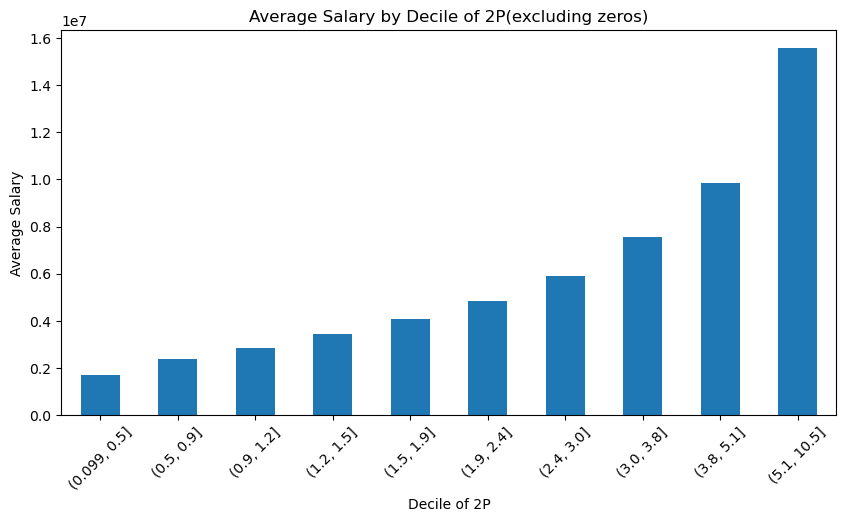

<Figure size 640x480 with 0 Axes>

In [80]:
plot_numeric_exclude_zeros('2P',df)

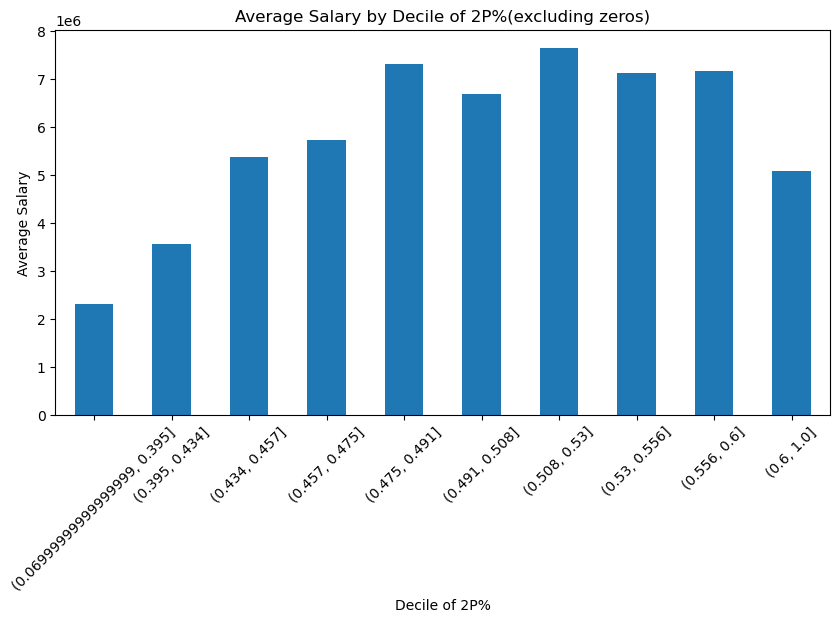

<Figure size 640x480 with 0 Axes>

In [81]:
plot_numeric_exclude_zeros('2P%',df)

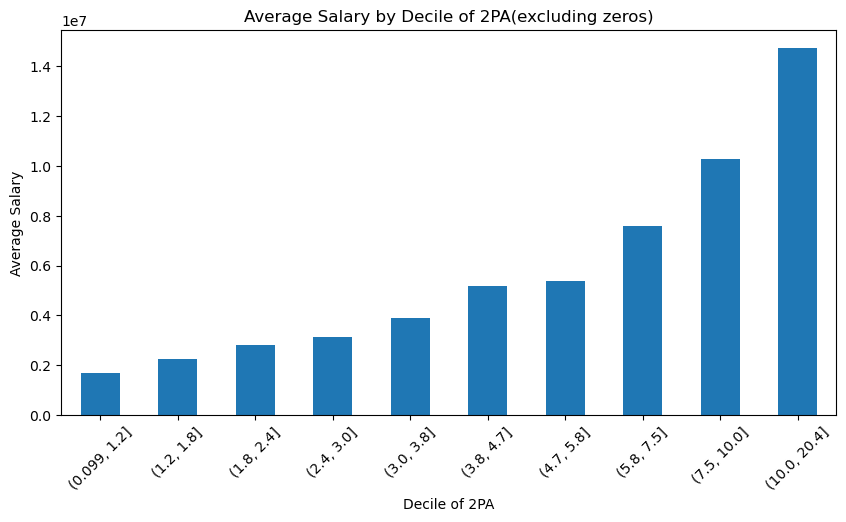

<Figure size 640x480 with 0 Axes>

In [82]:
plot_numeric_exclude_zeros('2PA',df)

The trend continues. The more shots a player takes or makes, the more they get paid. But efficiency is not quite as linear of a relationship. 

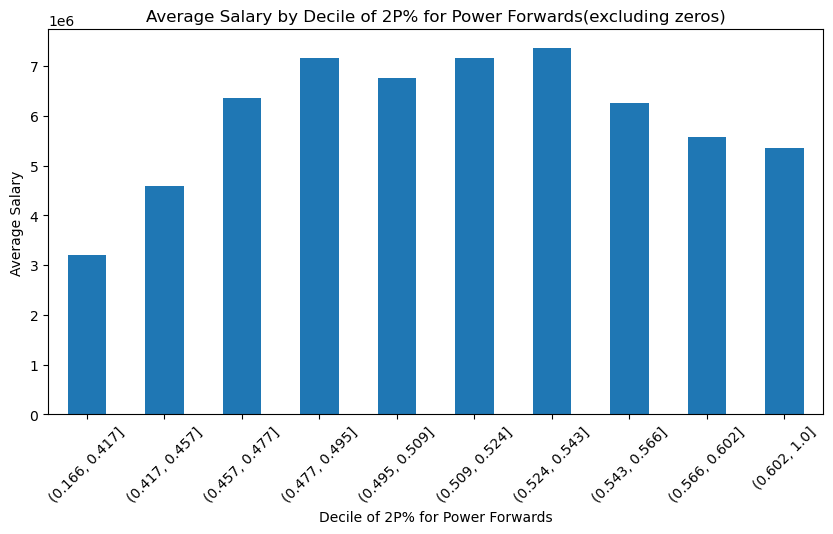

<Figure size 640x480 with 0 Axes>

In [83]:
plot_numeric_exclude_zeros('2P%',df_pf,' for Power Forwards')

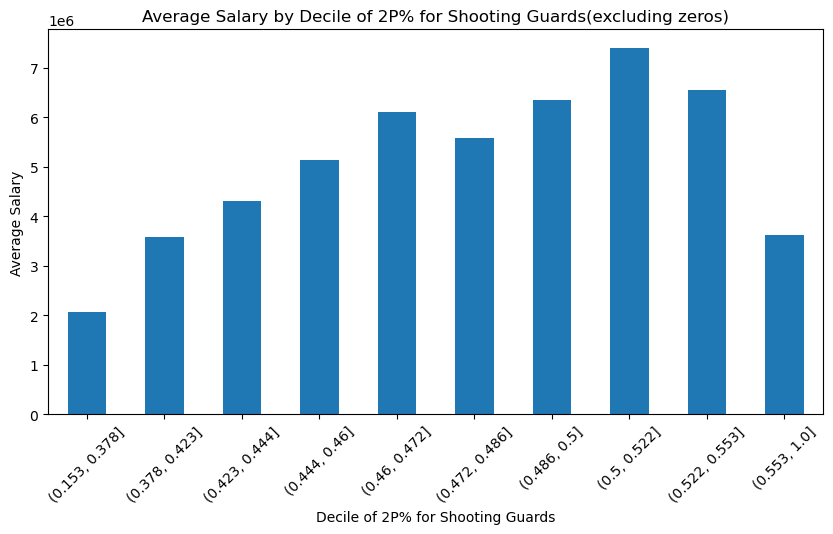

<Figure size 640x480 with 0 Axes>

In [84]:
plot_numeric_exclude_zeros('2P%',df_sg,' for Shooting Guards')

Surprising Results there, i would expect 2p% to matter more for centers than for shooting guards

In [85]:
df[df['2P%'].isna()].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,Year,Player Link,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,Cap Maximum,Years Experience Category,Draft Position Category,Total Minutes
811,Bobby Simmons,SF,30,SAS,2,0,8.0,0.0,1.5,0.000,0.0,1.5,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2011,/players/s/simmobo01.html,-5.5,0.000,1.0,0.0,0.0,0.0,0.0,15.7,0.0,0.0,0.0,8.6,0.0,0.0,0.0,-0.138,-8.9,-2.9,-11.8,0.0,71951.0,58040000,9-12,31-45,16.0
1895,Keith Bogans,SG,33,BOS,6,0,9.2,0.5,1.0,0.500,0.5,1.0,0.500,0.0,0.0,NaN,0.750,0.5,0.5,1.0,0.0,0.5,0.5,0.5,0.2,0.0,0.2,...,2014,/players/b/boganke01.html,9.9,0.820,1.0,0.5,0.0,6.4,3.1,7.7,0.9,0.0,12.0,6.7,0.1,0.0,0.1,0.121,-1.4,-0.6,-2.0,0.0,5058198.0,58679000,9-12,31-45,55.2
2442,Andre Dawkins,SG,23,MIA,4,0,5.5,0.3,1.5,0.167,0.3,1.5,0.167,0.0,0.0,NaN,0.250,0.0,0.0,NaN,0.0,0.5,0.5,0.3,0.0,0.0,0.3,...,2015,/players/d/dawkian01.html,-5.0,0.250,1.0,0.0,0.0,10.7,5.5,6.6,0.0,0.0,14.3,15.0,-0.1,0.0,-0.1,-0.172,-9.0,-3.8,-12.8,-0.1,59686.0,63065000,1-4,undrafted,22.0
2479,Jamaal Franklin,SG,23,DEN,3,0,4.3,0.3,0.7,0.500,0.3,0.7,0.500,0.0,0.0,NaN,0.750,0.0,0.0,NaN,0.3,0.3,0.7,1.0,0.0,0.3,1.0,...,2015,/players/f/frankja01.html,4.9,0.750,1.0,0.0,8.0,8.6,8.3,32.8,0.0,6.0,60.0,16.6,0.0,0.0,0.0,-0.063,-3.8,-1.8,-5.6,0.0,163296.0,63065000,1-4,31-45,12.9
2998,Joe Harris,SG,24,CLE,5,0,3.0,0.2,0.8,0.250,0.2,0.8,0.250,0.0,0.0,NaN,0.375,0.0,0.0,NaN,0.0,0.6,0.6,0.4,0.0,0.0,0.2,...,2016,/players/h/harrijo01.html,3.4,0.375,1.0,0.0,0.0,22.5,11.3,18.2,0.0,0.0,20.0,15.1,0.0,0.0,0.0,-0.032,-5.0,-0.9,-5.9,0.0,845059.0,70000000,1-4,31-45,15.0


In [86]:
fill_null_with_mean('2P%','2PA')

Pos
C     0.537231
PF    0.505004
PG    0.453005
SF    0.482954
SG    0.466181
Name: 2P%, dtype: float64


In [87]:
df.loc[[811,1894,2440]]['2P%']

811     0.482954
1894    0.667000
2440    0.601000
Name: 2P%, dtype: float64

### Free Throws

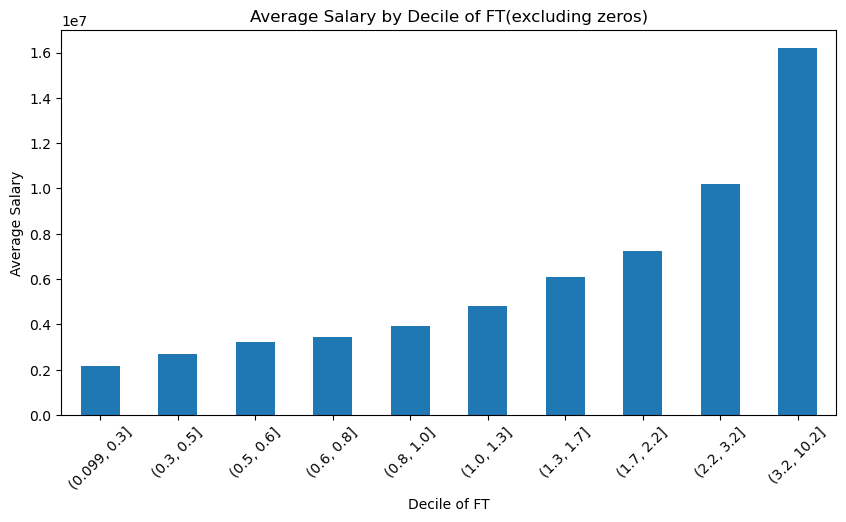

<Figure size 640x480 with 0 Axes>

In [88]:
plot_numeric_exclude_zeros('FT',df)

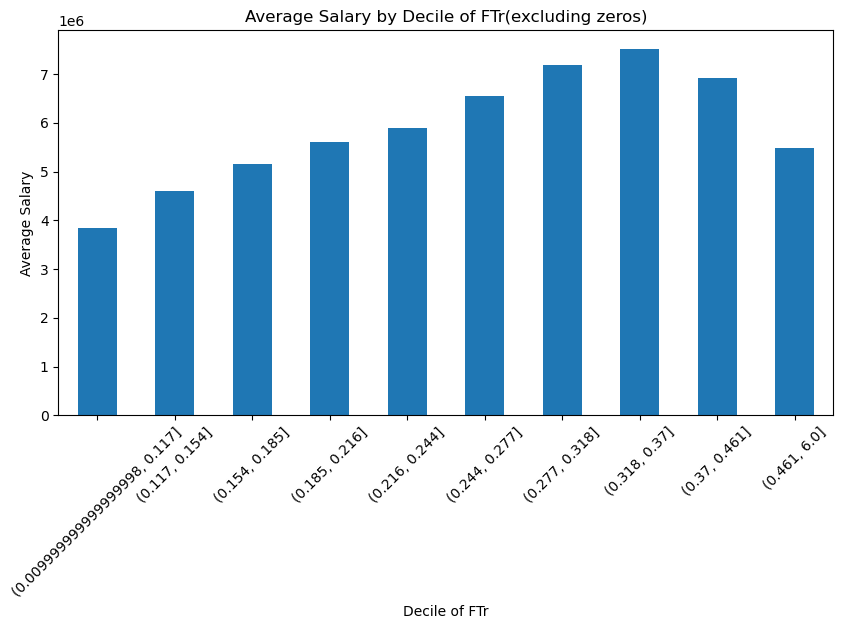

<Figure size 640x480 with 0 Axes>

In [89]:
plot_numeric_exclude_zeros('FTr',df)

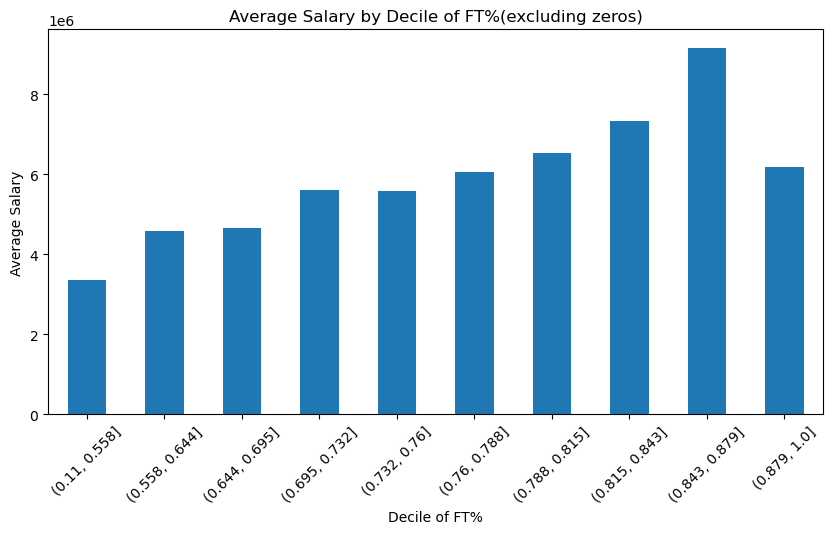

<Figure size 640x480 with 0 Axes>

In [90]:
plot_numeric_exclude_zeros('FT%',df)

Again the same trend. non advanced stats seem to be linear. Advanced/Efficiency stats are not perfectly linear.

In [91]:
fill_null_with_mean('FT%','FTA')

Pos
C     0.668039
PF    0.710092
PG    0.783149
SF    0.741424
SG    0.771244
Name: FT%, dtype: float64


### Turnovers

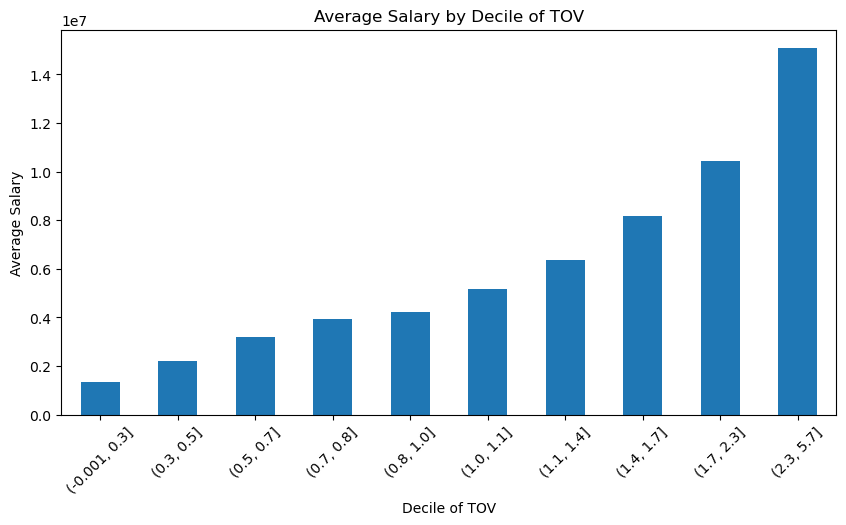

<Figure size 640x480 with 0 Axes>

In [99]:
plot_numeric('TOV',df)

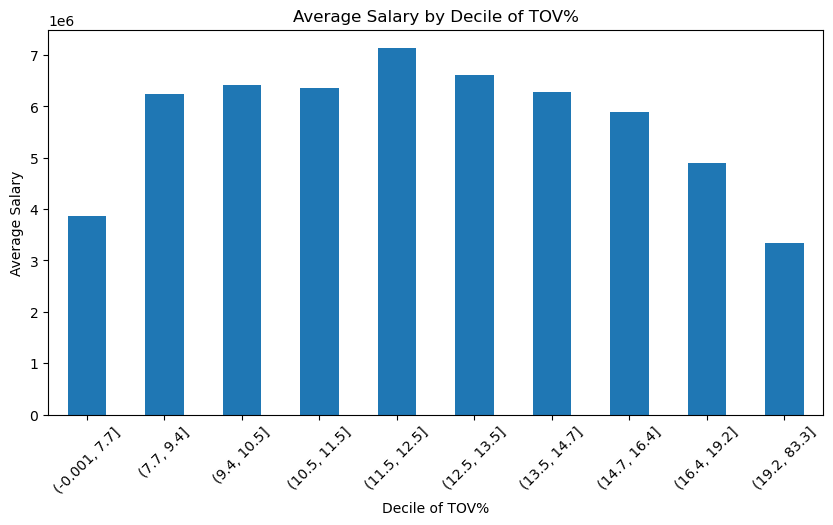

<Figure size 640x480 with 0 Axes>

In [100]:
plot_numeric('TOV%',df)

This is a good demonstration of why the advanced stats improved the model

In [92]:
df.isnull().sum()

Player                         0
Pos                            0
Age                            0
Tm                             0
G                              0
GS                             0
MP                             0
FG                             0
FGA                            0
FG%                            0
3P                             0
3PA                            0
3P%                            0
2P                             0
2PA                            0
2P%                            0
eFG%                           0
FT                             0
FTA                            0
FT%                            0
ORB                            0
DRB                            0
TRB                            0
AST                            0
STL                            0
BLK                            0
TOV                            0
PF                             0
PTS                            0
Year                           0
Player Lin

In [93]:
df.dropna(inplace= True)
# removing players with no Salary value

In [94]:
df.drop(columns = 'Player Link',inplace = True)

In [95]:
dataset_2023 = df[df['Year']==2023]

In [96]:
modeling_dataset = df[df['Year']!=2023]

I am saving the 2023 dataset for predictions. The model will be trained and tested on data from before 2023

In [97]:
modeling_dataset.to_csv('../data/modeling_dataset.csv',index = False)

In [98]:
dataset_2023.to_csv('../data/dataset_2023.csv',index = False)